# Wine Reviews 数据分析
## 一、数据概况

In [1]:
import pandas as pd

filename = "winemag-data_first150k.csv"
data = pd.read_csv(filename)

# 显示前5行数据
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [2]:
# 显示数据集的概况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [3]:
# 去除序号、description列数据
data = data.drop(columns=['Unnamed: 0', 'description'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 9 columns):
country        150925 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 10.4+ MB


## 二、数据可视化和摘要
### 2.1 标称属性
对于标称属性，给出每个可能聚会的频数，并进行可视化

country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12


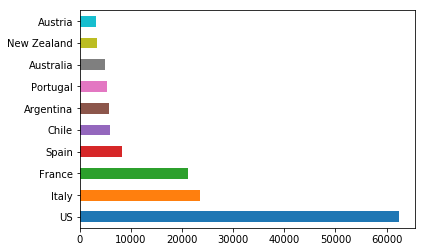

In [6]:
title_nominal = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']
for i in range(len(title_nominal)):
    # 打印数据名称
    print(title_nominal[i])
    # 打印频数
    print(getattr(data, title_nominal[i]).value_counts())
    # 给出频数前10的数据绘制而成的堆积图
    data[title_nominal[i]].value_counts().head(10).plot.barh()
    # 即只显示第一列'country'的数据，如果去掉break即可查看所有标称属性列数据。
    break

### 2.2 数值属性
#### 2.2.1 五数概括

In [7]:
# 使用describe()函数，可以得到总数、均值、标准差、最小值、第一四分位数、第二四分位数、第三四分位数、最大值
data.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


可以得到points和price列的五数概括：
      points price
最小值   80    4
Q1      86    16
中位数   88    24
Q3      90    40
最大值   100   2300

#### 2.2.2 缺失值统计

In [8]:
print('points', data['points'].isnull().sum())
print('price', data['price'].isnull().sum())

points 0
price 13695


#### 2.2.3 数据可视化
直方图

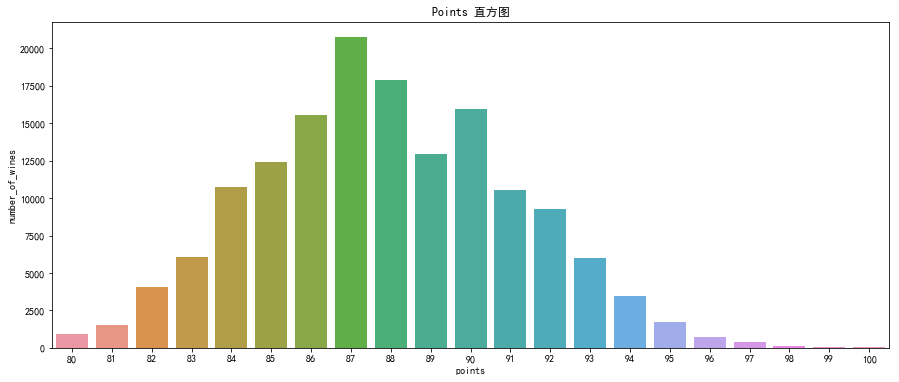

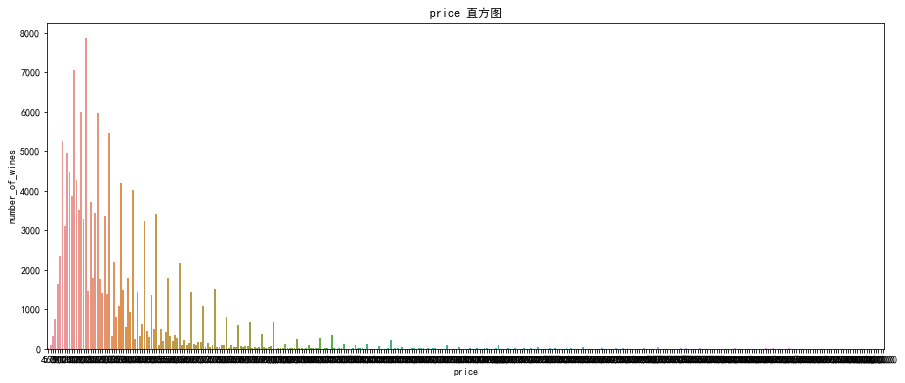

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def hist(data, x, y ,title):
    plt.figure(figsize = (15,6))
    plt.title(title)
    sns.barplot(x=x, y=y, data=data)
    locs, labels = plt.xticks()
    plt.show()

# points
temp = data['points'].value_counts()
data_points = pd.DataFrame({'points':temp.index, 'number_of_wines':temp.values})
hist(data_points, 'points', 'number_of_wines', 'Points 直方图')

# price
temp = data['price'].value_counts()
data_price = pd.DataFrame({'price':temp.index, 'number_of_wines':temp.values})
hist(data_price, 'price', 'number_of_wines', 'price 直方图')

盒图

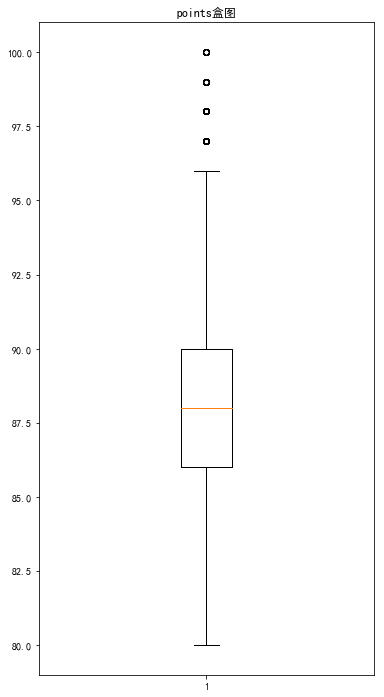

In [17]:
#points
fig = plt.figure(figsize=(6, 12))
plt.boxplot(data['points'], notch=False, sym='o', vert=True)
t = plt.title('points盒图')
plt.show()

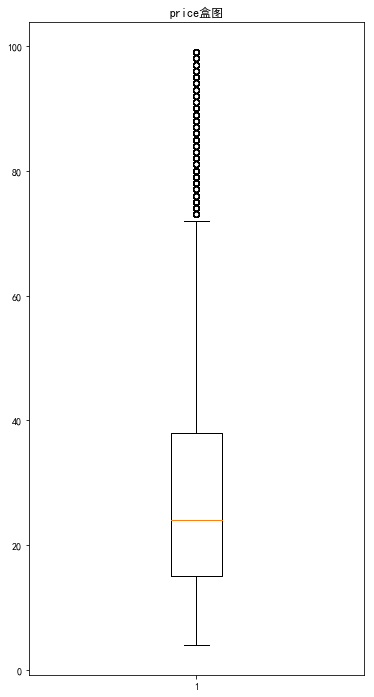

In [26]:
#price
fig = plt.figure(figsize=(6, 12))
# 选取price值为100以下的
plt.boxplot(data['price'].loc[data['price']<100], notch=False, sym='o', vert=True)
t = plt.title('price盒图')
plt.show()

## 三、数据缺失的处理
### 3.1 将缺失部分剔除

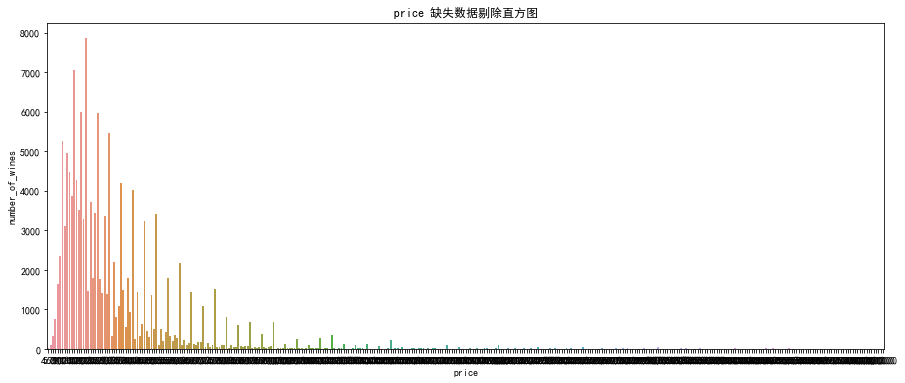

In [23]:
# 以price为例
price_delete = data['price'].dropna()

# 绘制直方图
temp = price_delete.value_counts()
data_price = pd.DataFrame({'price':temp.index, 'number_of_wines':temp.values})

hist(data_price, 'price', 'number_of_wines', 'price 缺失数据剔除直方图')

### 3.2 用最高频率值来填补缺失值

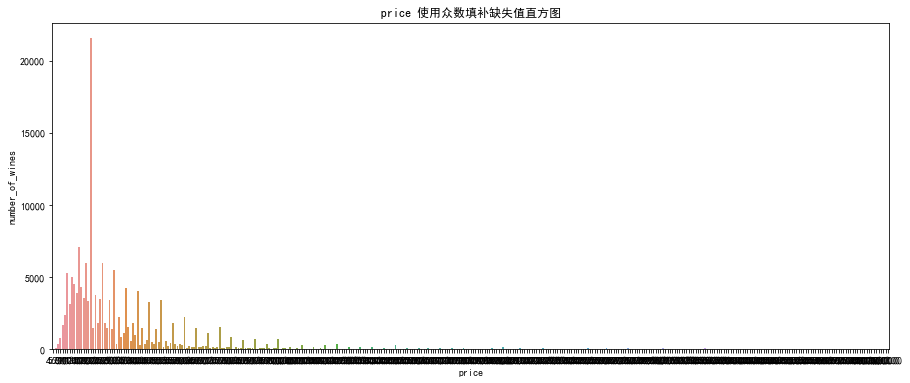

In [27]:
# price 为例
# temp为众数
temp = data['price'].mode()[0]

# 使用fillna填充
data_most = data['price'].fillna(temp)

# 直方图
temp = data_most.value_counts()
df = pd.DataFrame({'price':temp.index, 'number_of_wines':temp.values})

hist(df, 'price', 'number_of_wines', 'price 使用众数填补缺失值直方图')

### 3.3 通过属性的相关关系来填补缺失值
使用province对region_1进行填充

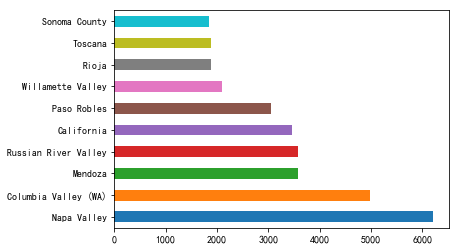

In [28]:
data_fill = pd.DataFrame(data, columns=['province', 'region_1'])
data_fill['region_1'].value_counts().head(10).plot.barh()

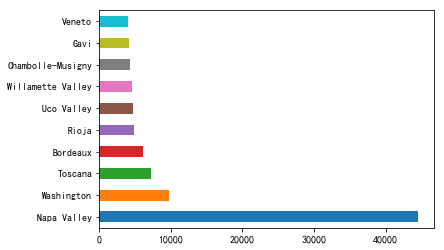

In [31]:
temp_dict = {}
for row in data_fill.iterrows():
    temp_dict[row[1]['province']] = row[1]['region_1']

for row in data_fill.iterrows():
    region = temp_dict[row[1]['province']]
    row[1]['region_1'] = region

data_fill['region_1'].value_counts().head(10).plot.barh()

通过堆积图可以看出填充前后的变化
### 3.4 通过数据对象之间的相似性来填充缺失值

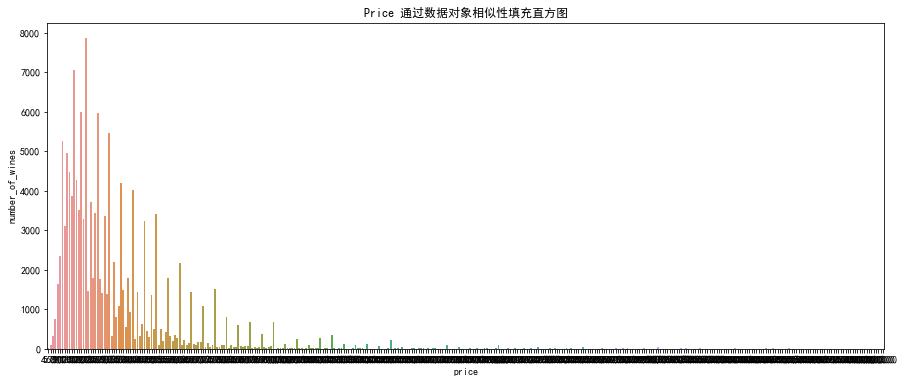

In [35]:
data_sim = data[['price', 'points']]
point2price = {}

for row in data_sim.iterrows():
    if point2price.get(row[1]['points'], None):
        if not pd.isnull(row[1]['price']):
            point2price[row[1]['points']][0] += row[1]['price']
            point2price[row[1]['points']][1] += 1
    else:
        if not pd.isnull(row[1]['price']):
            point2price[row[1]['points']] = [row[1]['price'], 1]
            
for k in point2price.keys():
    point2price[k][0] = round(point2price[k][0] / point2price[k][1], 4)

for row in data_sim.iterrows():
    if pd.isnull(row[1]['price']):
        row[1]['price'] = point2price[row[1]['points']][0]

#price直方图
temp = data_sim['price'].value_counts()
df = pd.DataFrame({'price':temp.index, 'number_of_wines':temp.values})

hist(df, 'price', 'number_of_wines', 'Price 通过数据对象相似性填充直方图')